In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
select_tr_quakes = """
SELECT * 
FROM quake_tr 
WHERE 
lat >= 30.00 AND lat <=47.00
AND lon >= 21.00 AND lon <=50.00
AND ml >= 3.5
ORDER BY quake_time DESC
"""

In [3]:
#pg_name, pg_pass, pg_host, pg_por pg_db = "quake_tr", "quake_tr", "quake_tr_postgres", 5432, "quake_tr"
pg_name, pg_pass, pg_host, pg_port, pg_db = "quake_tr", "quake_tr", "localhost", 5435, "quake_tr"
engine = create_engine(f"postgresql://{pg_name}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")

In [4]:
df = pd.read_sql_query(select_tr_quakes, con=engine)

In [5]:
df

,quake_id,quake_code,quake_time,lat,lon,depth,xm,md,ml,mw,ms,mb,quake_type,location
0,221647,20200831195841,2020-08-31 19:58:41.120,34.5390,25.5542,78.5,3.9,0.0,3.7,3.9,0.0,0.0,Ke,GIRIT ADASI ACIKLARI (AKDENIZ)
1,221655,20200831133927,2020-08-31 13:39:27.500,34.8393,26.9113,8.4,3.6,0.0,3.6,3.6,0.0,0.0,Ke,GIRIT ADASI ACIKLARI (AKDENIZ)
2,221783,20200829033626,2020-08-29 03:36:26.340,39.6762,27.8122,5.5,3.7,0.0,3.7,3.7,0.0,0.0,Ke,KALAYCILAR- (BALIKESIR) [North East 2.2 km]
3,221816,20200828142050,2020-08-28 14:20:50.500,44.1183,31.4732,13.4,3.7,0.0,3.7,3.7,0.0,0.0,Ke,KARADENIZ
4,221887,20200826180157,2020-08-26 18:01:57.270,35.5632,31.6060,5.0,3.6,0.0,3.6,3.6,0.0,0.0,Ke,AKDENIZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,5717,20070108051539,2007-01-08 05:15:39.180,39.5785,25.7612,7.7,3.6,3.5,3.6,NaN,0.0,0.0,Ke,EGE DENIZI
6942,5718,20070108050724,2007-01-08 05:07:24.220,39.5227,25.7868,13.4,3.7,3.5,3.7,NaN,0.0,0.0,Ke,EGE DENIZI
6943,5720,20070108034444,2007-01-08 03:44:44.390,39.5547,25.8235,6.1,3.7,3.5,3.7,NaN,0.0,0.0,Ke,GÜLPINAR AÇIKLARI-ÇANAKKALE (EGE DENIZI)
6944,5721,20070108033540,2007-01-08 03:35:40.000,39.4400,25.4000,5.0,4.1,3.8,4.1,NaN,0.0,0.0,Ke,EGE DENIZI


In [6]:
df = df.sample(frac=1)
X = df[["lat", "lon"]].values

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [7]:
def plot_clusters(X, labels):
    plt.figure(figsize=(29,17))
    sns.scatterplot(x=X[:, 1], y=X[:, 0], hue=labels)
    plt.show()
    plt.close()

silhouette score for 2 clusters is 0.49240817325410674


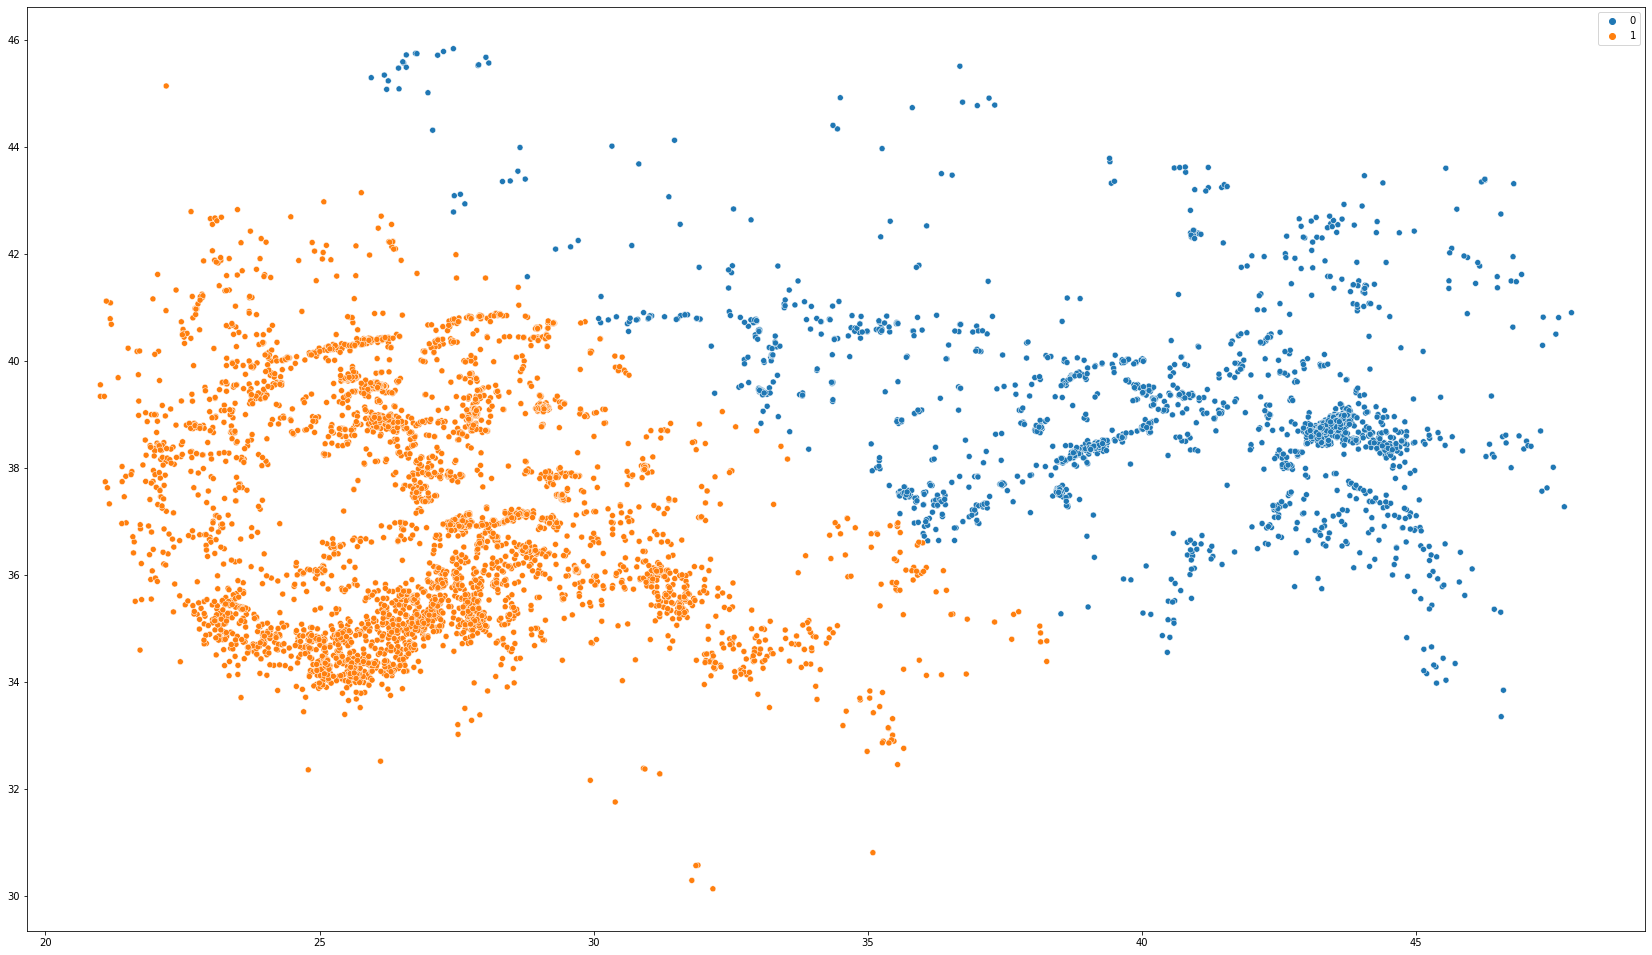

silhouette score for 3 clusters is 0.5619151958429747


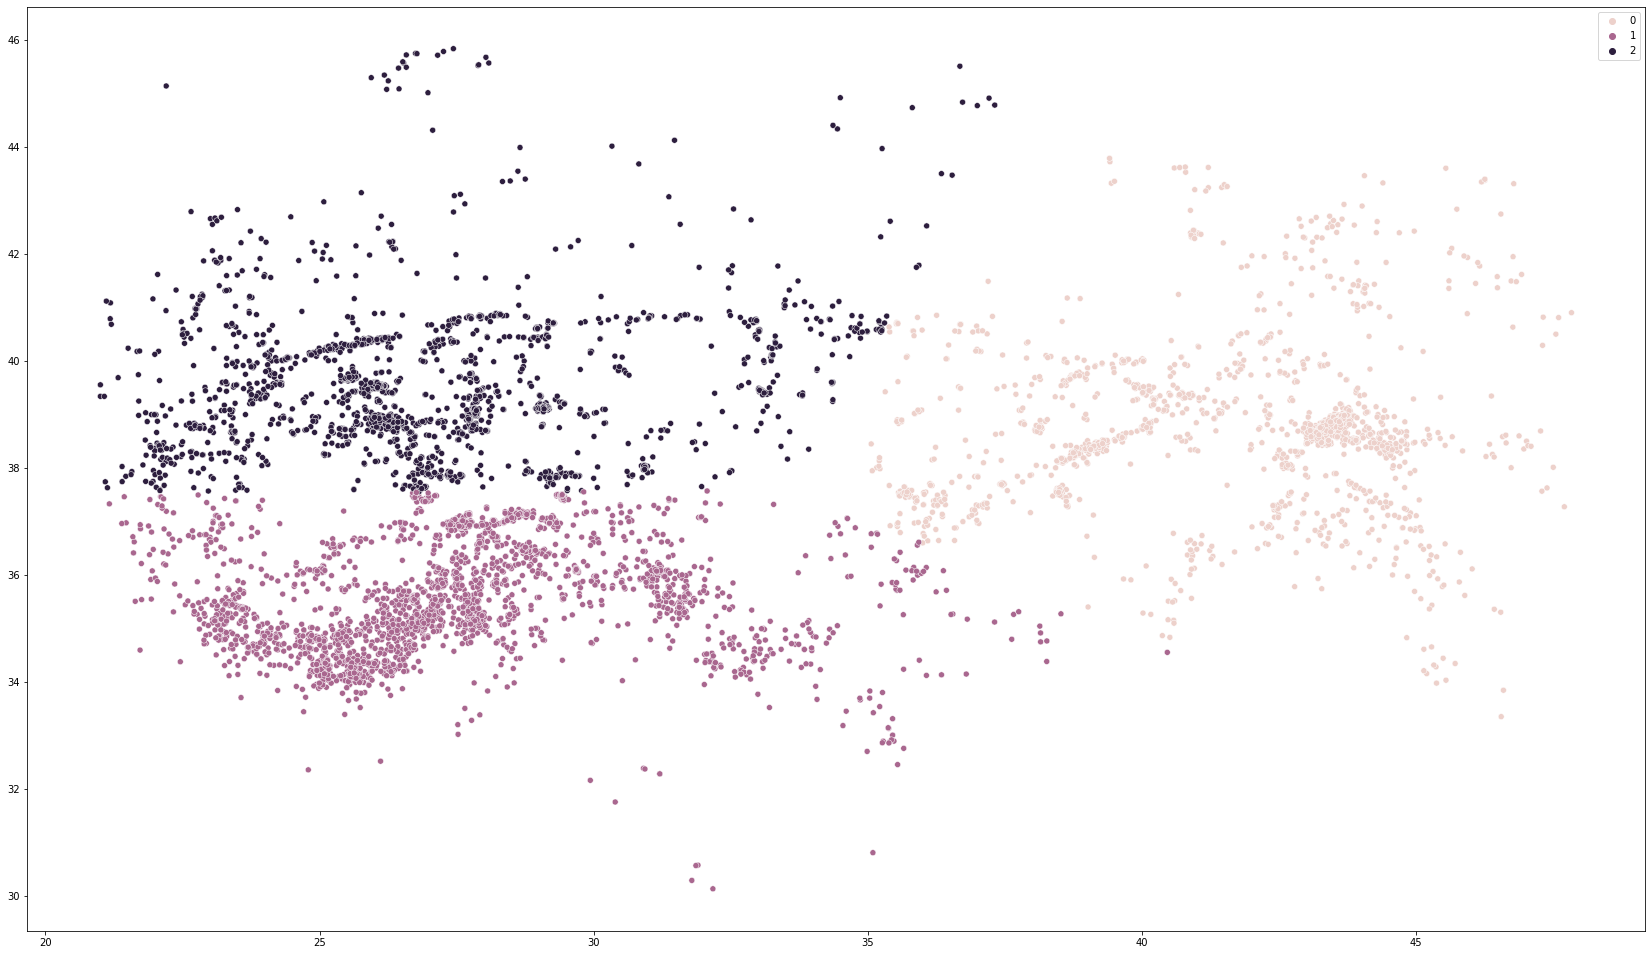

silhouette score for 4 clusters is 0.5471984982835848


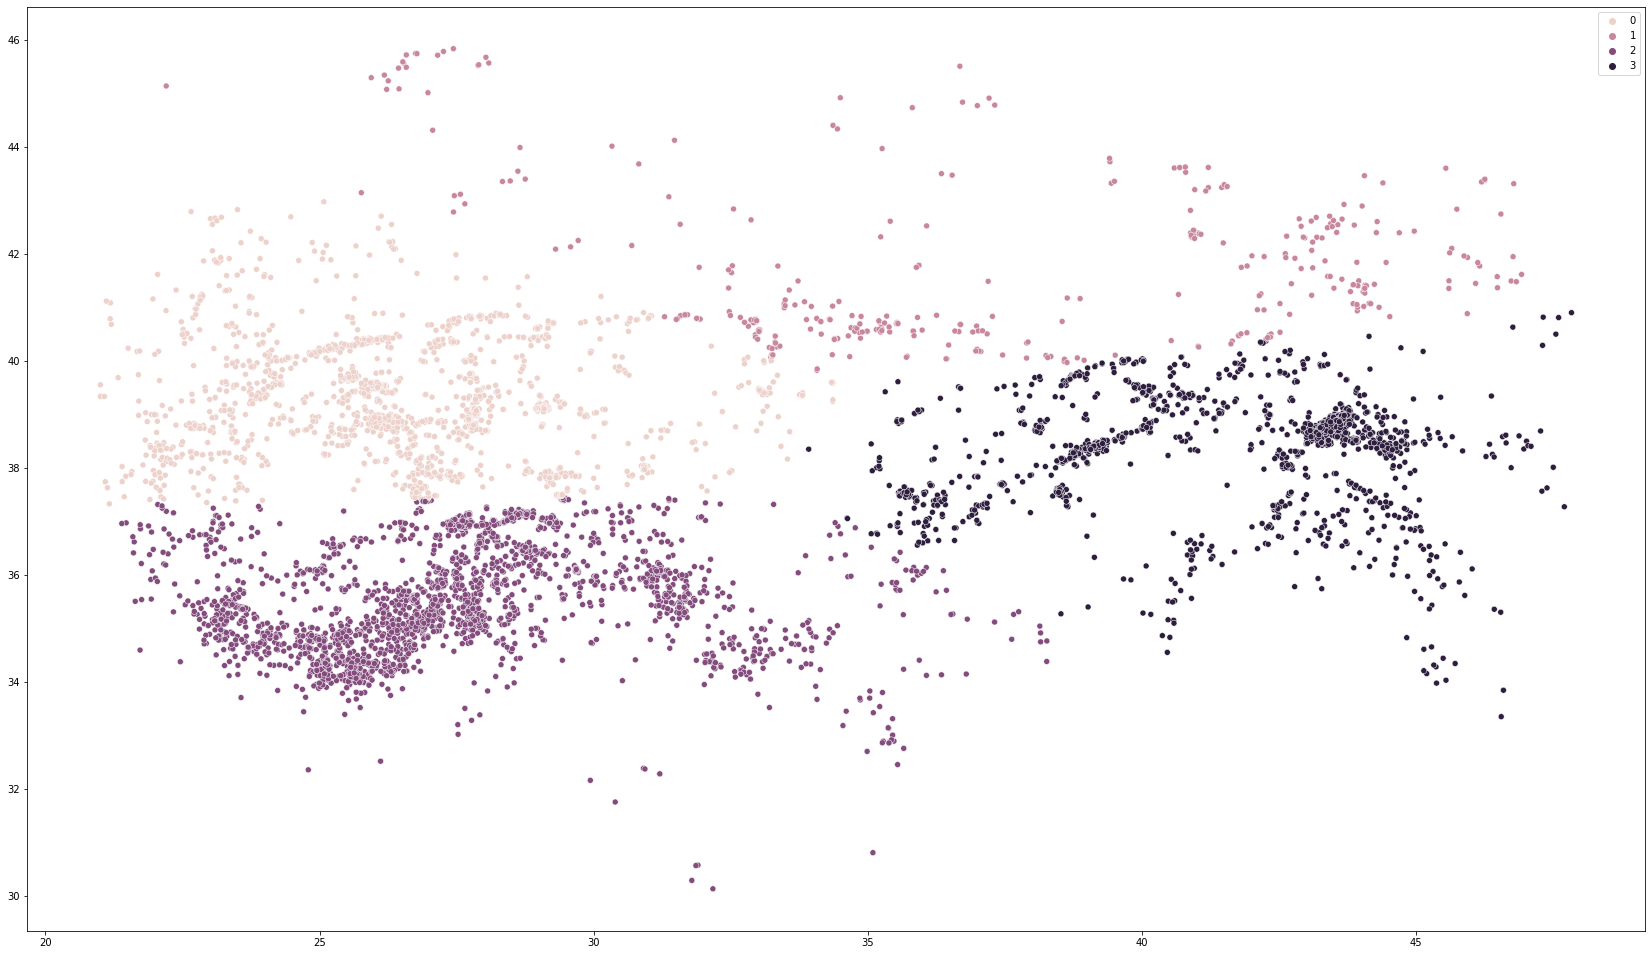

silhouette score for 5 clusters is 0.4762830794946163


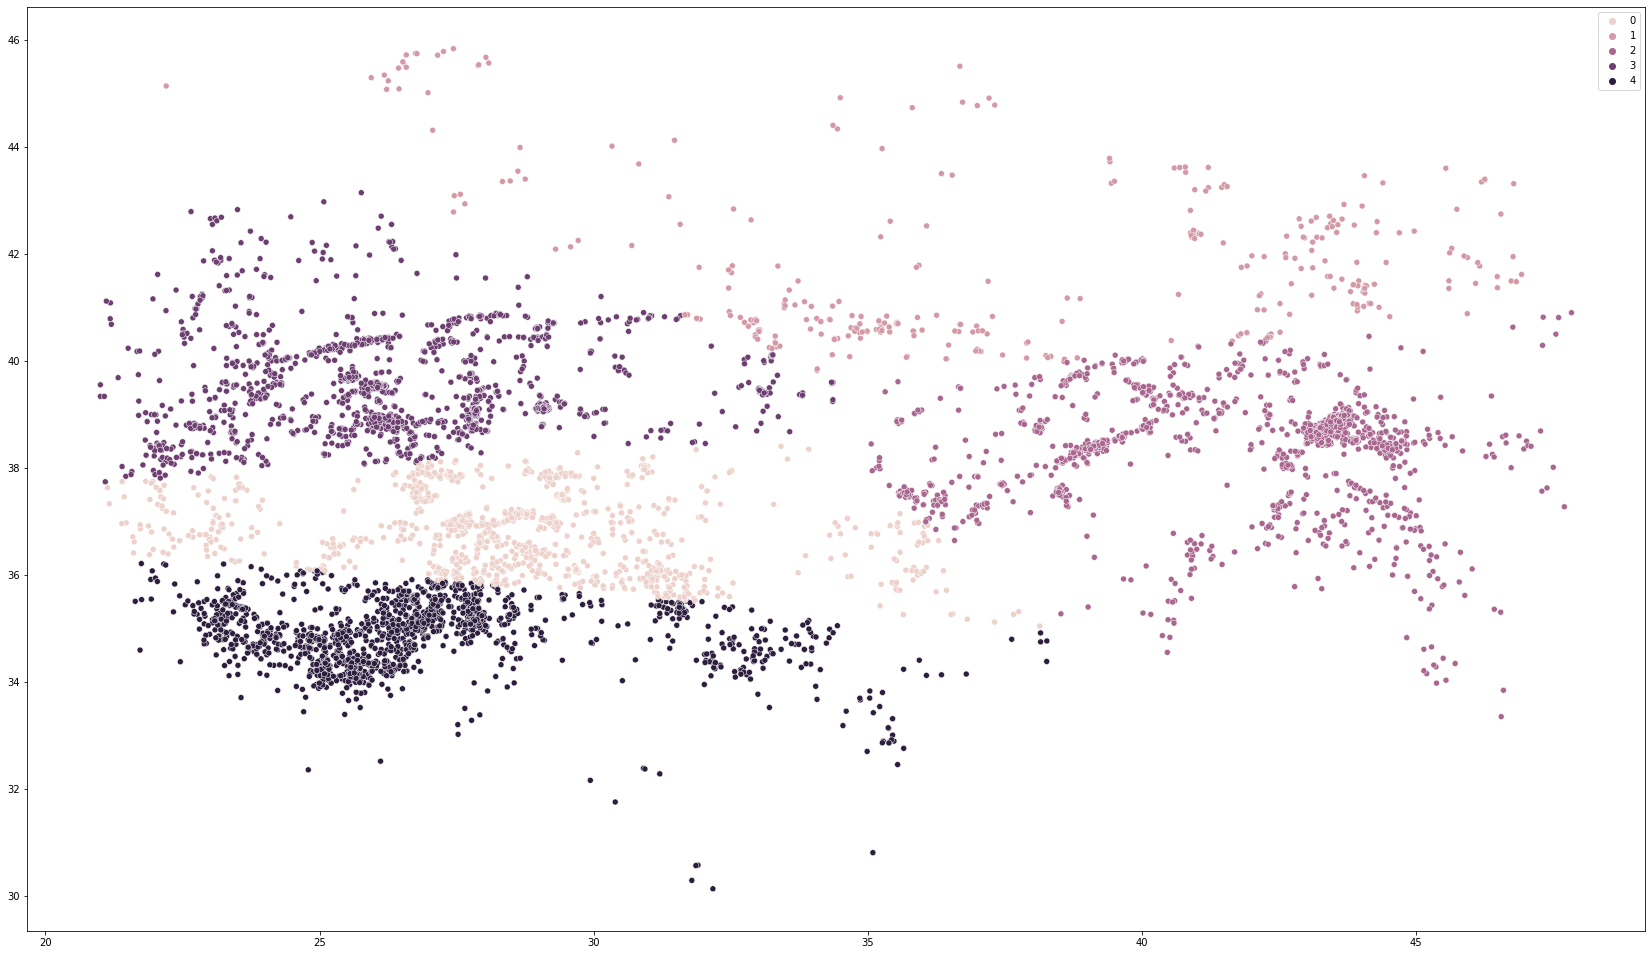

silhouette score for 6 clusters is 0.45749588166774807


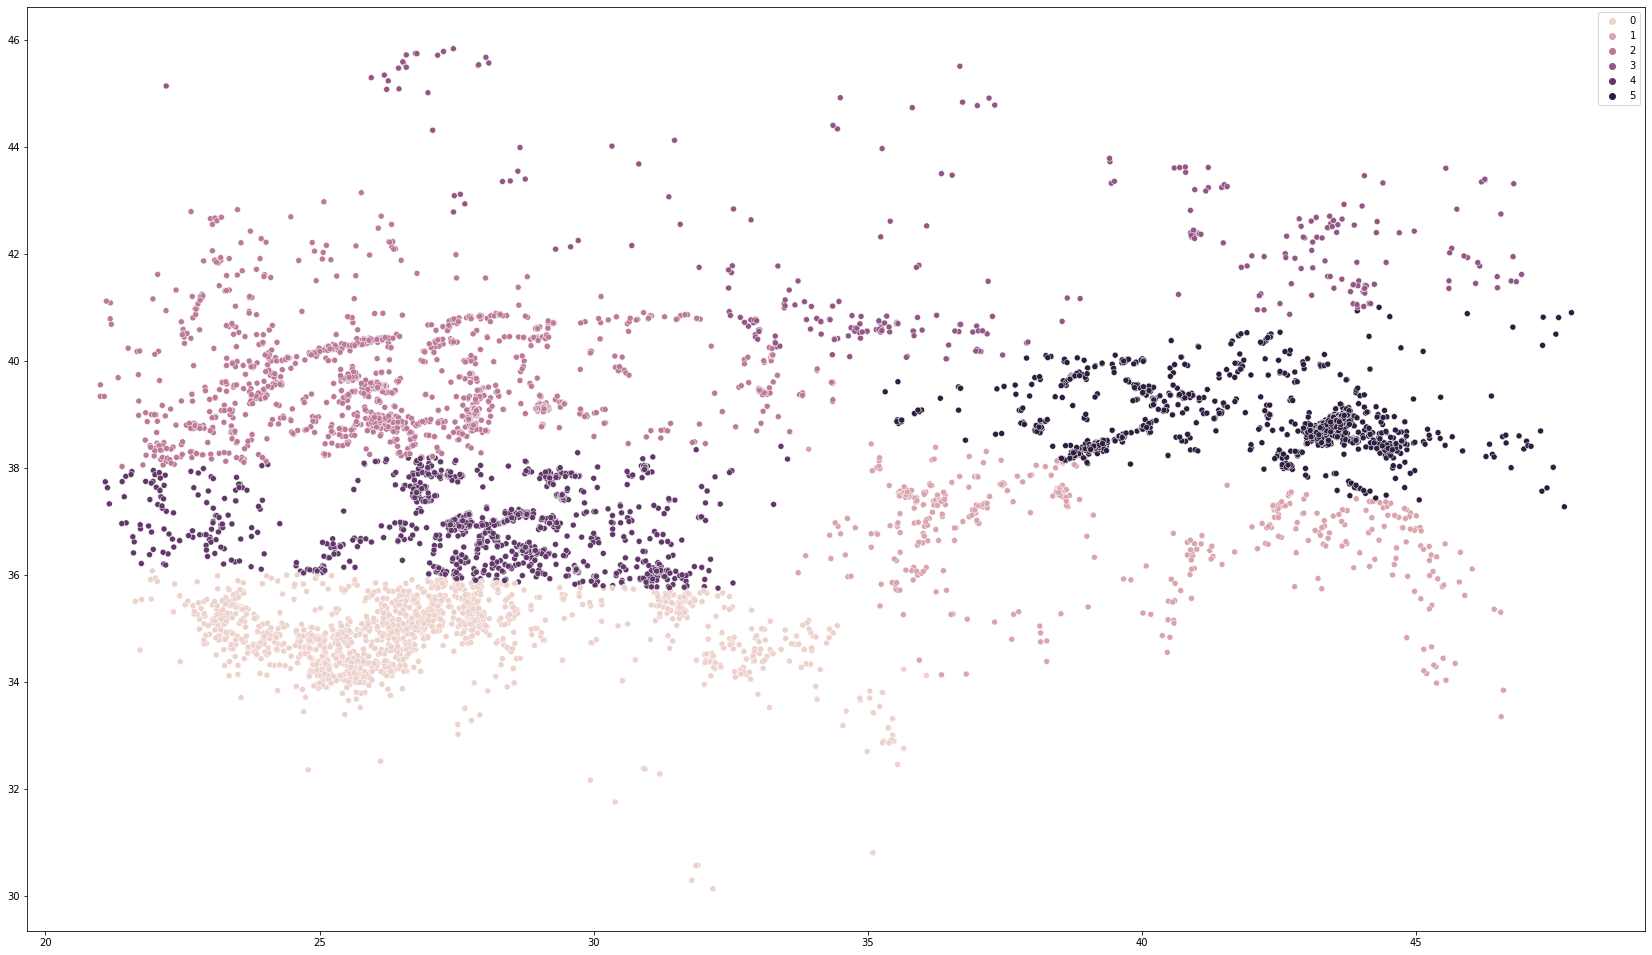

silhouette score for 7 clusters is 0.44176350743466264


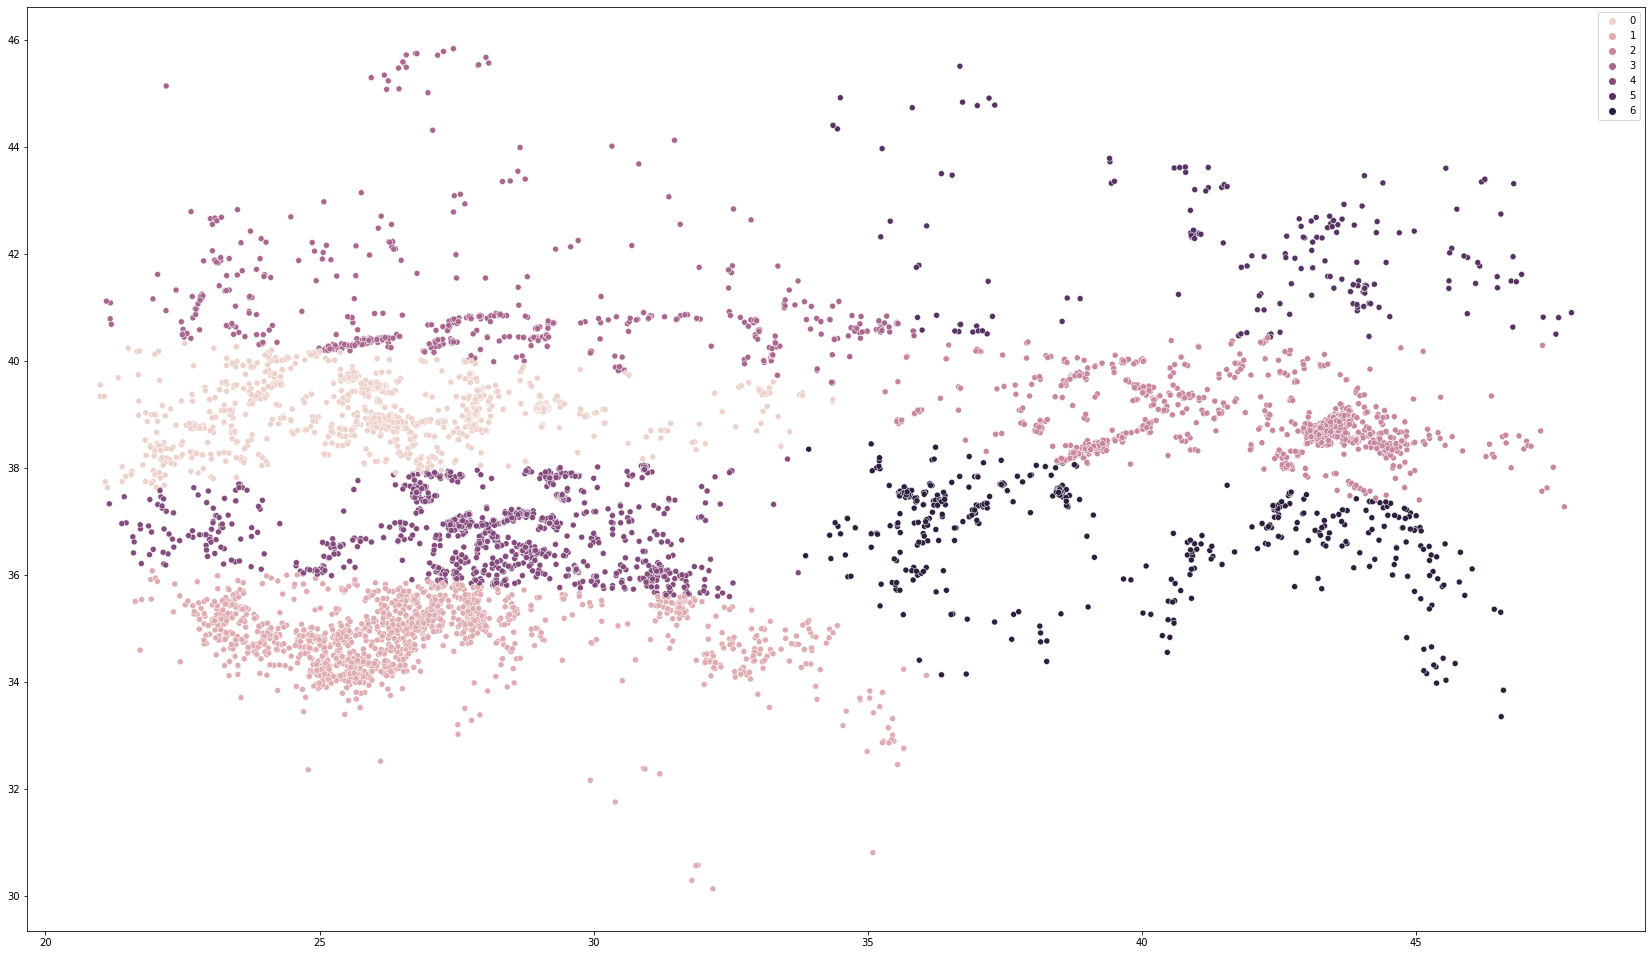

silhouette score for 8 clusters is 0.438910807272059


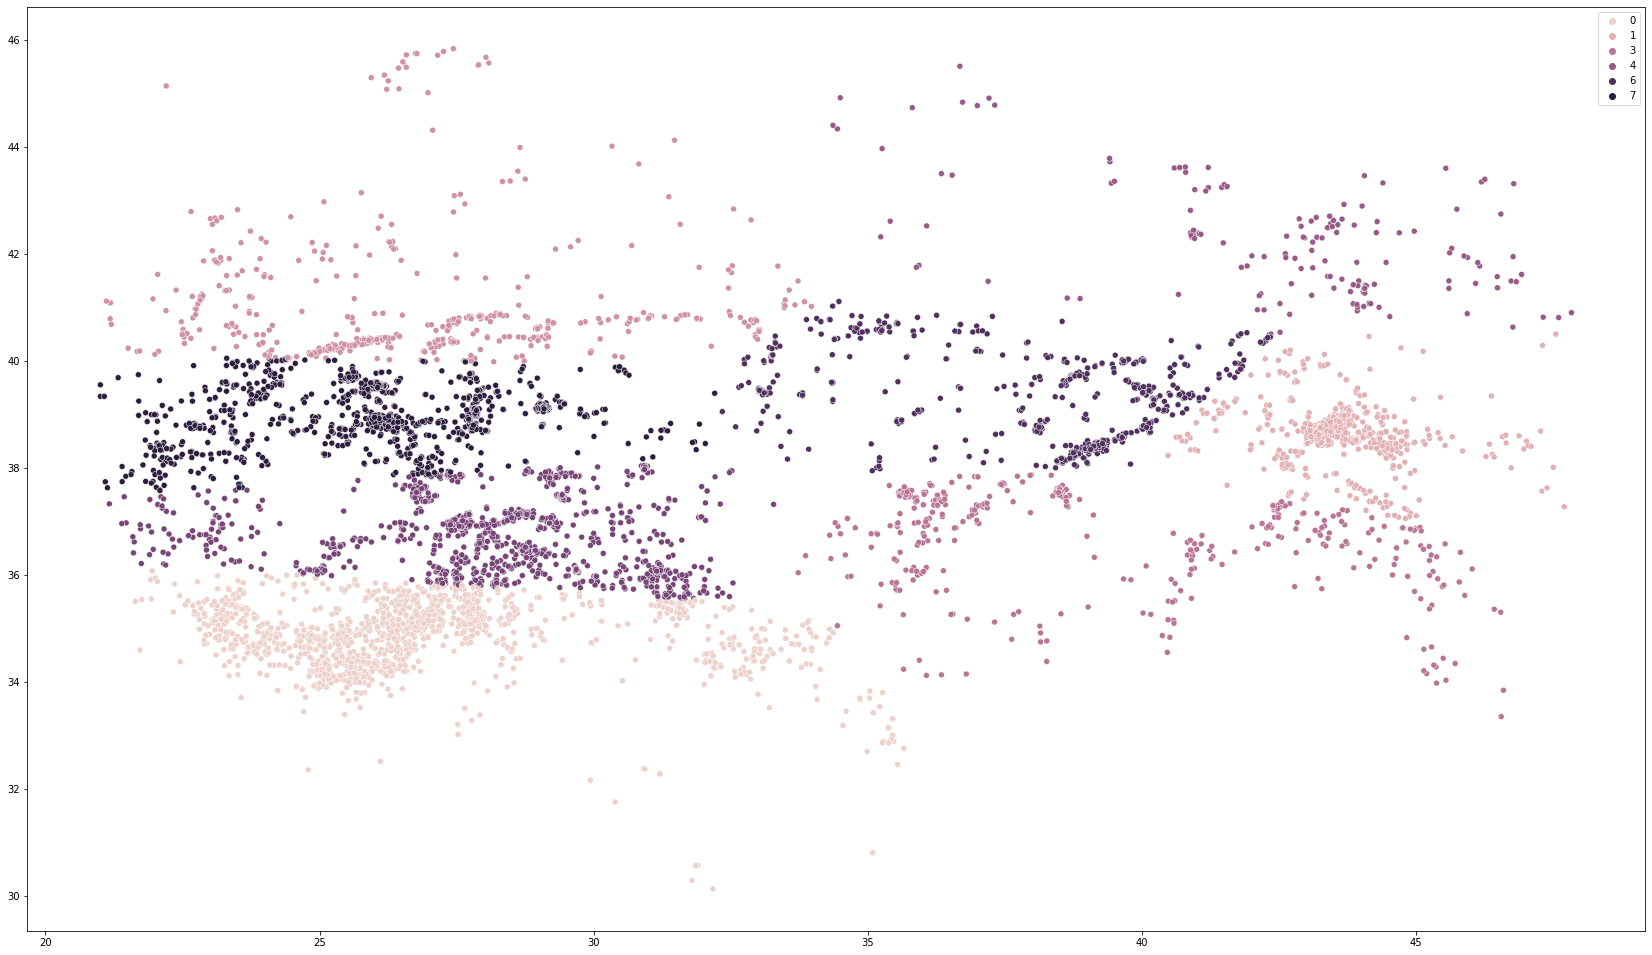

silhouette score for 9 clusters is 0.46614683840484994


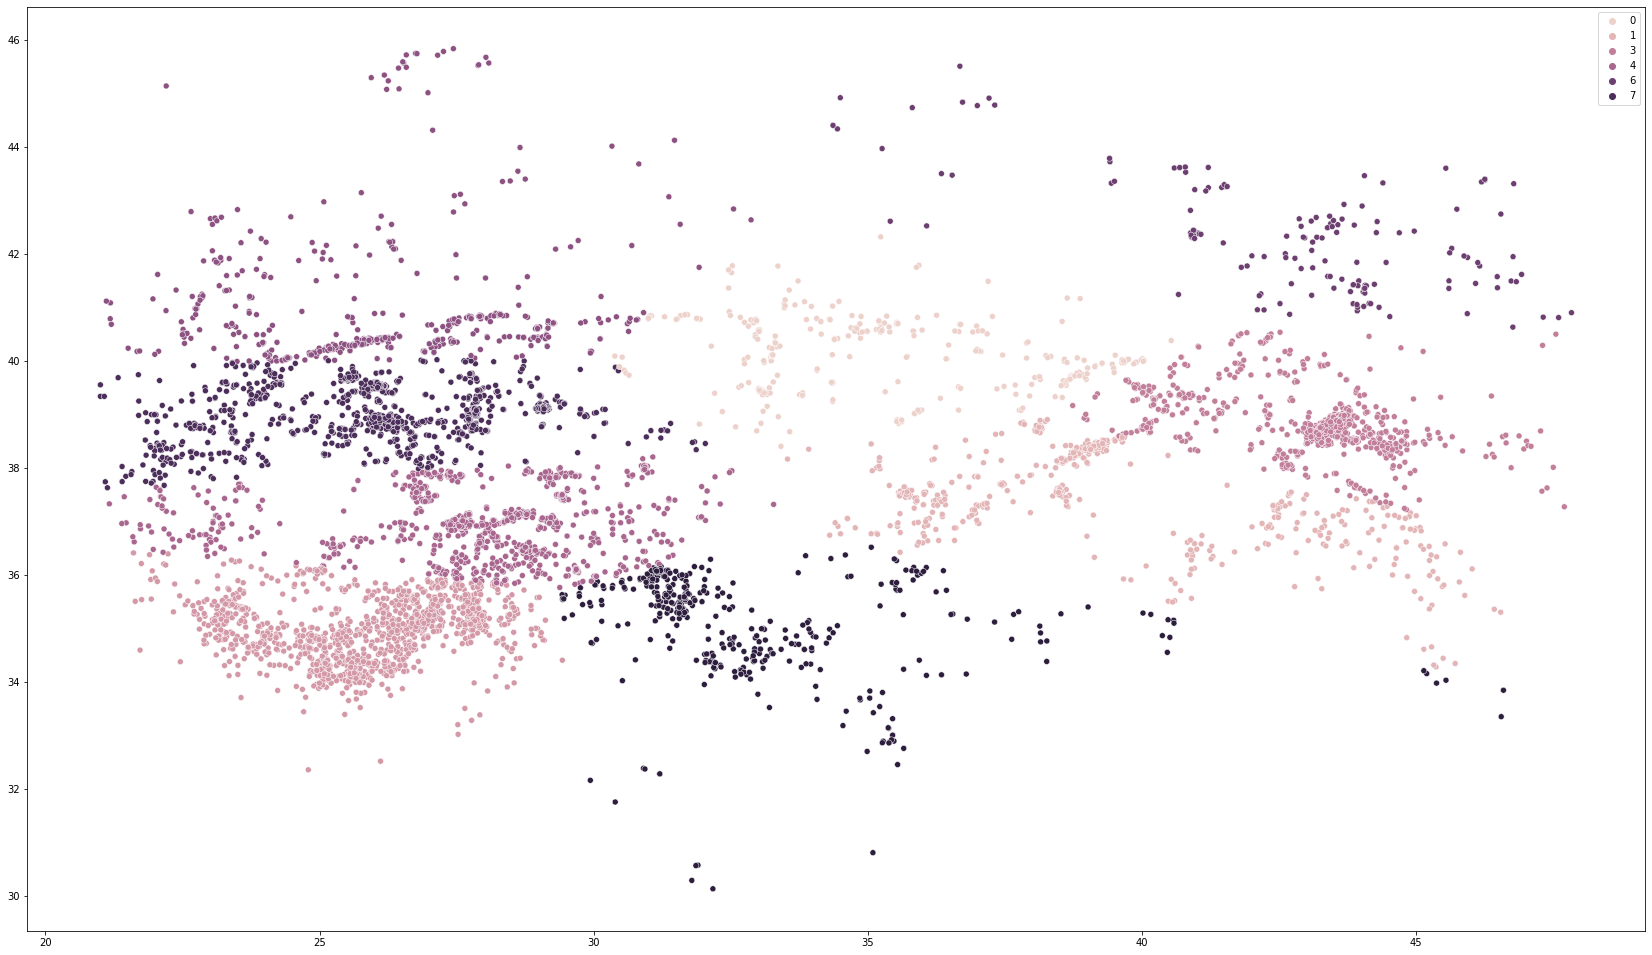

In [8]:
score_max, best_n = -1, 2
for n_clusters in range(2, 10):
    model = KMeans(n_clusters=n_clusters, max_iter=300)
    labels = model.fit_predict(X_norm)
    score = silhouette_score(X_norm, labels)
    print(f"silhouette score for {n_clusters} clusters is {score}")
    if score > score_max:
        best_n = n_clusters
        score_max = score
    plot_clusters(X, labels)